In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv("data/hwg.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


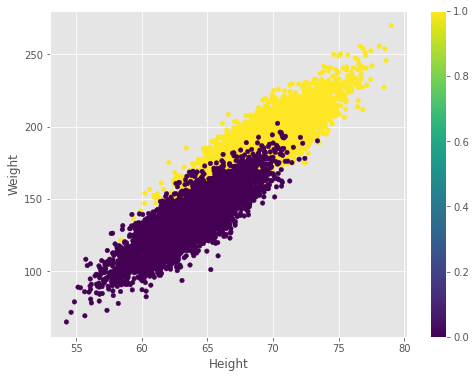

In [3]:
fig, ax = plt.subplots(figsize=(8, 6))
df["genc"] = df["Gender"] == "Male"
df.plot.scatter("Height", "Weight", c=df["genc"].astype(int), ax=ax, cmap=plt.cm.viridis)
plt.show()

### Variances of Single Variables

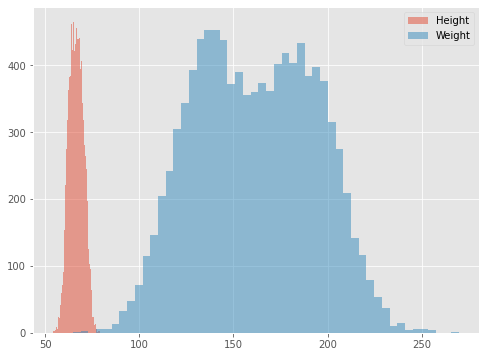

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))
df["Height"].hist(bins=50, ax=ax, alpha=0.5, label="Height")
df["Weight"].hist(bins=50, ax=ax, alpha=0.5, label="Weight")
plt.legend()
plt.show()

### The Covariance Matrix

In [5]:
np.cov(df["Height"], df["Weight"])

array([[  14.80347264,  114.24265645],
       [ 114.24265645, 1030.95185544]])

#### Example of Low Covariance - Rotate the Male data by 90 degrees

The Rotation Matrix:
$$R=\begin{bmatrix}cos\theta&-sin\theta\\sin\theta&cos\theta\end{bmatrix}$$

In [6]:
def get_rotation_matrix(theta):  # in RADIANS!
    return np.array([[np.cos(theta), - np.sin(theta)],
                     [np.sin(theta), np.cos(theta)]])

In [7]:
# Normalize the data, so we are rotating about the origin
X = df[['Height', 'Weight']].values
xCent = X - X.mean(axis=0)
xNorm = xCent / xCent.std(axis=0)

# put it back into the dataframe
df['hnorm'] = xNorm[:, 0]
df['wnorm'] = xNorm[:, 1]

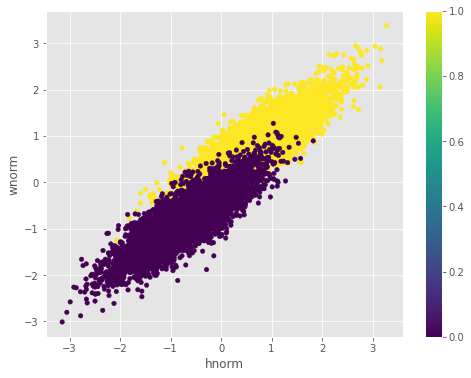

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
df.plot.scatter("hnorm", "wnorm", c=df["genc"].astype(int), ax=ax, cmap=plt.cm.viridis)
plt.show()

In [9]:
males = df[df['Gender'] == 'Male']
X = males[['hnorm', 'wnorm']].values
females = df[df['Gender'] == 'Female']
Y = females[['hnorm', 'wnorm']].values

In [10]:
rotator_90 = get_rotation_matrix(np.pi / 2)

In [11]:
xrot = np.dot(rotator_90, X.T)

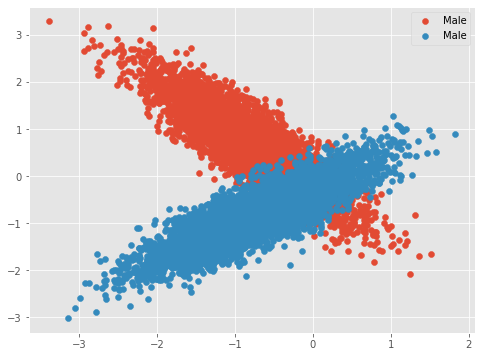

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(*xrot, label="Male")
plt.scatter(*Y.T, label="Male")
plt.legend()
plt.show()

In [13]:
newData = np.r_[xrot.T, Y]
np.cov(newData.T)

array([[ 0.43811275, -0.06076481],
       [-0.06076481,  1.00585732]])

In [14]:
rotator_180 = get_rotation_matrix(np.pi)
v = np.array([[1], [1]])
np.dot(rotator_180, v)

array([[-1.],
       [-1.]])

## Exercise Data

In [15]:
df = pd.read_csv("data/exercise_data.csv")
df.head()

,var-1,var-2
0,2,43
1,4,67
2,7,34
3,3,98
4,4,67


In [16]:
np.cov(df["var-1"], df["var-2"])

array([[  5.35606061,   3.15151515],
       [  3.15151515, 631.87878788]])